In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
rec_df = pd.read_csv('rec-with-percentage-no-dup.csv')

In [5]:
rec_df.describe()

,user_id,reading_id,relative_difficulty,unknown_count,unique_word_count,total_count,flesch_kincaid
count,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000
mean,119.000000,3.000000,0.016539,2.798565,146.717274,19.589958,76.811757
std,69.013382,2.000598,0.020256,3.738548,60.876568,15.391088,21.545750
min,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,60.310000
25%,59.000000,1.000000,0.000000,0.000000,77.000000,9.000000,61.220000
50%,119.000000,3.000000,0.011834,1.000000,169.000000,18.000000,67.150000
75%,179.000000,5.000000,0.025000,4.000000,206.000000,27.000000,89.750000
max,238.000000,6.000000,0.213592,44.000000,211.000000,85.000000,124.400000


(239, 8)


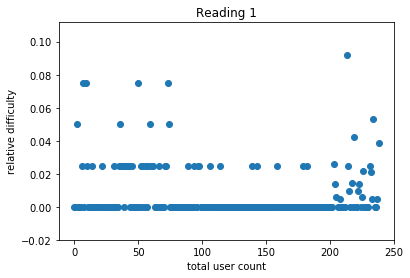

(239, 8)


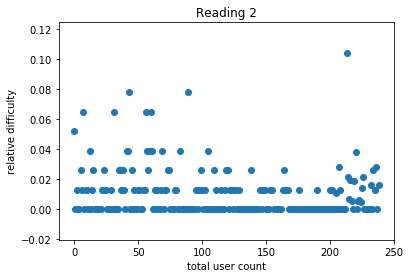

(239, 8)


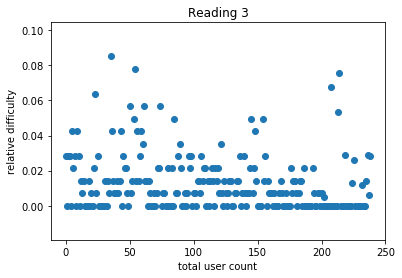

(239, 8)


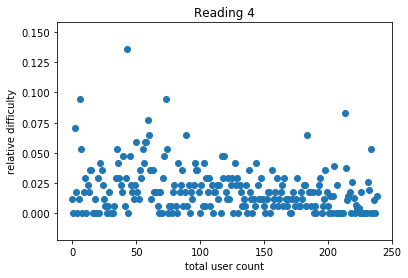

(239, 8)


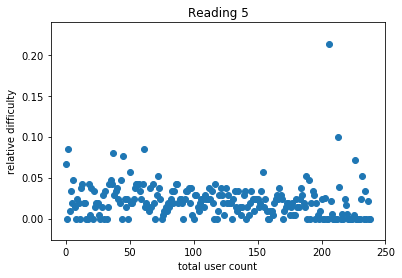

(239, 8)


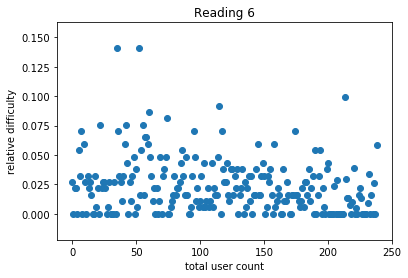

(239, 8)


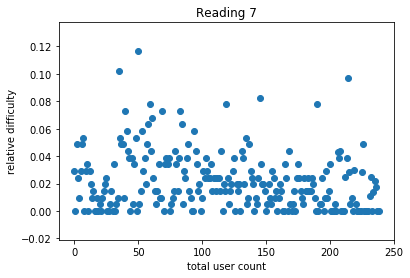

In [11]:
for i in range(7):
    A = rec_df.loc[(rec_df['reading_id'] == i)]
    print(A.shape)
#     A = A.sort_values('relative_difficulty').reset_index(drop=True)

    plt.scatter(A['user_id'], A['relative_difficulty'])
    plt.title('Reading ' + str(i + 1))
    plt.xlabel('total user count')
    plt.ylabel('relative difficulty')
    plt.show()

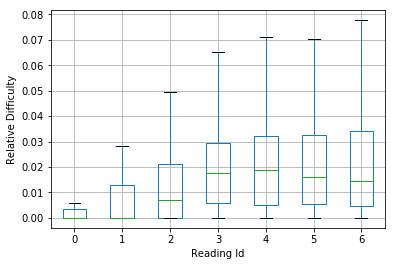

+-----+------------+------------+------------+------------+
|     |          0 |          1 |          2 |          3 |
|-----+------------+------------+------------+------------|
|   0 | 0          | 0.0519481  | 0.0283688  | 0.0118343  |
|   1 | 0          | 0          | 0          | 0          |
|   2 | 0.05       | 0.012987   | 0.0283688  | 0.0710059  |
|   3 | 0          | 0          | 0.0283688  | 0.0177515  |
|   4 | 0          | 0          | 0          | 0          |
|   5 | 0          | 0.025974   | 0.0425532  | 0.0118343  |
|   6 | 0.025      | 0.012987   | 0.0212766  | 0.0946746  |
|   7 | 0.075      | 0.0649351  | 0.0283688  | 0.0532544  |
|   8 | 0          | 0          | 0          | 0          |
|   9 | 0.075      | 0.012987   | 0.0425532  | 0.0177515  |
|  10 | 0.025      | 0.012987   | 0.0283688  | 0.0295858  |
|  11 | 0          | 0          | 0          | 0          |
|  12 | 0          | 0.038961   | 0.0141844  | 0.0236686  |
|  13 | 0          | 0          | 0.0070

In [113]:
arr = []
for i in range(238):
    A = rec_df.loc[(rec_df['user_id'] == i)].reset_index(drop=True)
    arr.append(A['relative_difficulty'])
df = pd.DataFrame(arr, columns=range(7))
df.boxplot(showfliers=False)
plt.xlabel('Reading Id')
plt.ylabel('Relative Difficulty')
plt.show()
print(tabulate(df[[0,1,2,3]].reset_index(drop=True), headers='keys', tablefmt='psql'))

In [110]:
from tabulate import tabulate
measures = []
for i in range(7):
    mean = df.iloc[:,i].mean()
    maxi = df.iloc[:,i].max()
    mini = df.iloc[:,i].min()
    measures.append([i, mean])
df = pd.DataFrame([[val[0], "{0:.2f}%".format(val[1] * 100)] for val in measures], columns=['reading', 'mean'])
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+-----------+--------+
|    |   reading | mean   |
|----+-----------+--------|
|  0 |         0 | 0.73%  |
|  1 |         1 | 0.97%  |
|  2 |         2 | 1.26%  |
|  3 |         3 | 1.94%  |
|  4 |         4 | 2.17%  |
|  5 |         5 | 2.33%  |
|  6 |         6 | 2.18%  |
+----+-----------+--------+


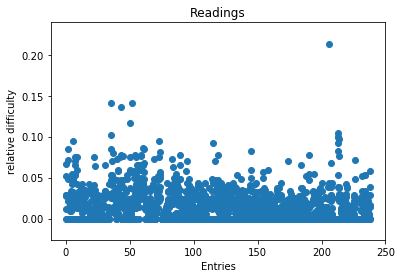

In [7]:
A = rec_df.sort_values('relative_difficulty').reset_index(drop=True)
# A.head()

plt.scatter(A['user_id'], A['relative_difficulty'])
plt.title('Readings')
plt.xlabel('Entries')
plt.ylabel('relative difficulty')
plt.show()

(7, 8)


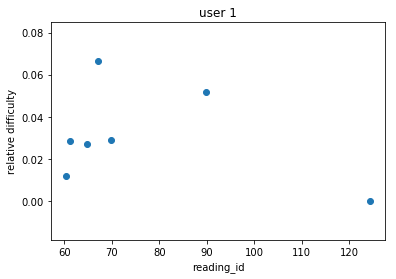

(7, 8)


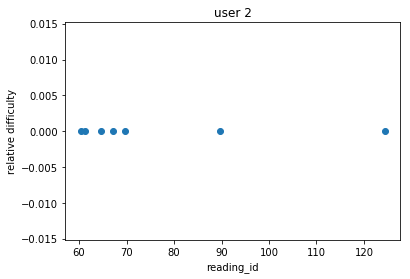

(7, 8)


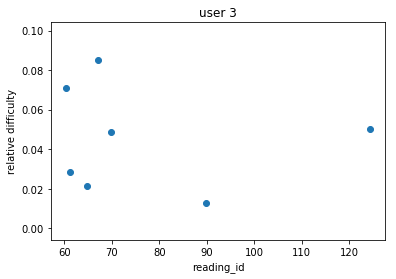

(7, 8)


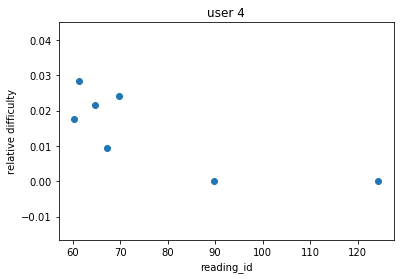

(7, 8)


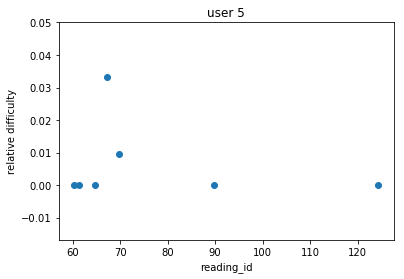

(7, 8)


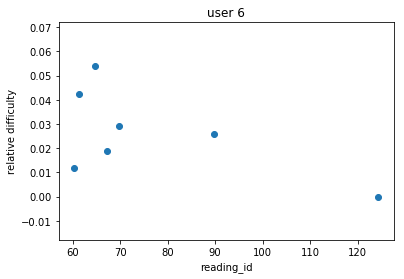

(7, 8)


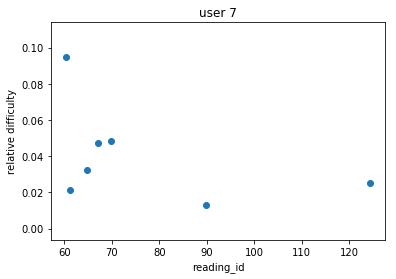

(7, 8)


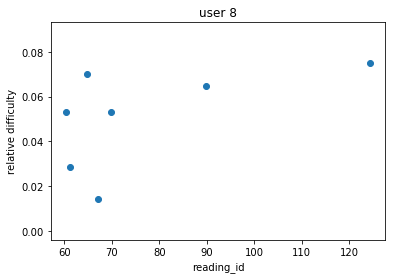

(7, 8)


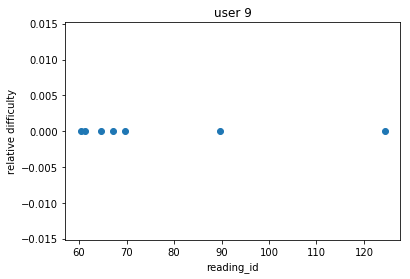

(7, 8)


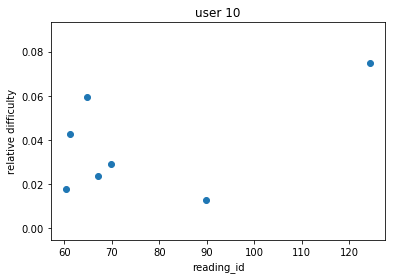

In [10]:
for i in range(10):
    A = rec_df.loc[(rec_df['user_id'] == i)]
    print(A.shape)
    plt.scatter(A['flesch_kincaid'], A['relative_difficulty'])
    plt.title('user ' + str(i + 1))
    plt.xlabel('reading_id')
    plt.ylabel('relative difficulty')
    plt.show()

In [32]:
data = rec_df
features = ['flesch_kincaid', 'total_count']
target = 'relative_difficulty'
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg = LinearRegression()
for i in range(1,3) :
    rfe = RFE(reg, i)
    rfe = rfe.fit(data[features], data[target])
    filtered = data[features][data[features].columns[rfe.support_]].columns
    X_train, X_test, y_train, y_test = train_test_split(data[filtered], data[target], test_size=0.3, random_state=0)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_train)
    print('Accuracy of regression classifier on train set: '+ str(i) +': {:.2f}'.format(reg.score(X_train, y_train)))
    y_pred = reg.predict(X_test)
    print('Accuracy of regression classifier on test set:'+ str(i) +' {:.2f}'.format(reg.score(X_test, y_test)))

Accuracy of regression classifier on train set: 1: 0.45
Accuracy of regression classifier on test set:1 0.45
Accuracy of regression classifier on train set: 2: 0.51
Accuracy of regression classifier on test set:2 0.51
